In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer
from scipy.spatial.distance import mahalanobis

import pickle



### Data preprocessing

In [4]:
data = pd.read_csv("/Users/yihongan/Desktop/phishing_data.csv")
data.head()

,url,age,num_suspicious_words,has_ip_address,is_url_shortened,length,subdomain_ratio,num_dots,num_www,num_dcom,...,num_semic,num_comma,login_time,num_ex_links,num_redirects,num_img,num_iframe,num_hidden,ext_tot_ratio,status
0,http://www.crestonwood.com/router.php,14.536986,0,0,0,37,0.513514,3,1,1,...,0,0,0.436091,0.0,0.0,0.0,0.0,0.0,0.0,0
1,http://shadetreetechnology.com/V4/validation/a...,18.419178,0,0,0,77,0.298701,1,0,1,...,0,0,0.118067,1.0,0.0,0.0,0.0,0.0,1.0,1
2,http://rgipt.ac.in,15.487671,0,0,0,18,0.611111,2,0,0,...,0,0,1.712393,58.0,1.0,29.0,0.0,0.0,58.0,0
3,http://www.iracing.com/tracks/gateway-motorspo...,25.052055,0,0,0,55,0.272727,2,1,1,...,0,0,1.573773,136.0,1.0,50.0,0.0,1.0,136.0,0
4,http://www.mutuo.it,23.276712,0,0,0,19,0.631579,2,1,0,...,0,0,0.968172,12.0,1.0,25.0,0.0,0.0,12.0,0


In [5]:
data.describe()

,age,num_suspicious_words,has_ip_address,is_url_shortened,length,subdomain_ratio,num_dots,num_www,num_dcom,num_http,...,num_semic,num_comma,login_time,num_ex_links,num_redirects,num_img,num_iframe,num_hidden,ext_tot_ratio,status
count,13755.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,...,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000,17701.000000
mean,17.837635,0.215525,0.002486,0.002203,50.943393,0.484201,2.453703,0.481159,0.628552,0.630190,...,0.036721,0.001582,1.720172,66.289306,0.678888,12.518332,0.255692,0.903847,59.739101,0.415061
std,8.705115,0.627378,0.049797,0.046889,47.973024,0.214971,1.091242,0.507178,0.531958,0.499448,...,0.445450,0.050955,2.190131,179.577534,0.896030,62.835140,0.943510,6.255350,158.591121,0.492747
min,0.002740,0.000000,0.000000,0.000000,10.000000,0.010823,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.016160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.742466,0.000000,0.000000,0.000000,30.000000,0.314286,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.593586,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.920548,0.000000,0.000000,0.000000,40.000000,0.475000,2.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,1.159260,8.000000,0.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,24.656164,0.000000,0.000000,0.000000,57.000000,0.653846,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.999527,68.000000,1.000000,9.000000,0.000000,0.000000,58.000000,1.000000
max,38.191781,7.000000,1.000000,1.000000,1641.000000,1.000000,22.000000,3.000000,5.000000,4.000000,...,20.000000,3.000000,64.001232,9448.000000,8.000000,6435.000000,38.000000,308.000000,6049.000000,1.000000


In [54]:
data.columns

Index(['url', 'age', 'num_suspicious_words', 'has_ip_address',
       'is_url_shortened', 'length', 'subdomain_ratio', 'num_dots', 'num_www',
       'num_dcom', 'num_http', 'num_https', 'num_2slash', 'num_quest',
       'num_prtc', 'num_equal', 'num_star', 'num_dollar', 'num_under',
       'num_space', 'num_slash', 'num_dash', 'num_at', 'num_tile', 'num_line',
       'num_colon', 'num_semic', 'num_comma', 'login_time', 'num_ex_links',
       'num_redirects', 'num_img', 'num_iframe', 'num_hidden', 'ext_tot_ratio',
       'status'],
      dtype='object')

In [6]:
grouped_age_status = data.groupby("status")["age"].apply(lambda x: x.isnull().mean())
grouped_age_status

status
0    0.154047
1    0.319995
Name: age, dtype: float64

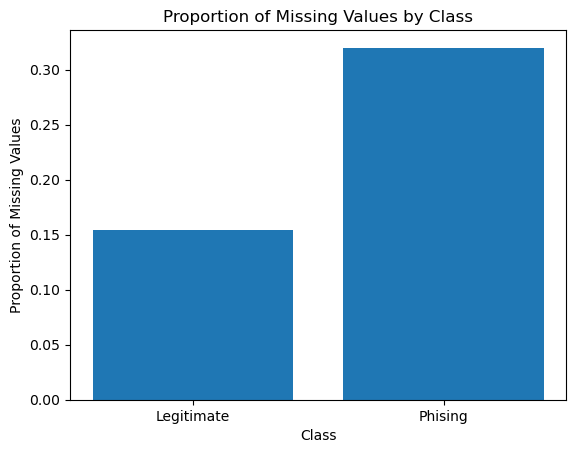

In [7]:
plt.bar(grouped_age_status.index, grouped_age_status.values)
plt.xticks(grouped_age_status.index, ["Legitimate", "Phising"])
plt.title("Proportion of Missing Values by Class")
plt.xlabel("Class")
plt.ylabel("Proportion of Missing Values")
plt.show()

In [8]:
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data['status'], random_state=4012)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

# Separate input and output variables
X_train = train_data.drop(columns=['url', 'status'])
y_train = train_data['status']
X_test = test_data.drop(columns=['url', 'status'])
y_test = test_data['status']

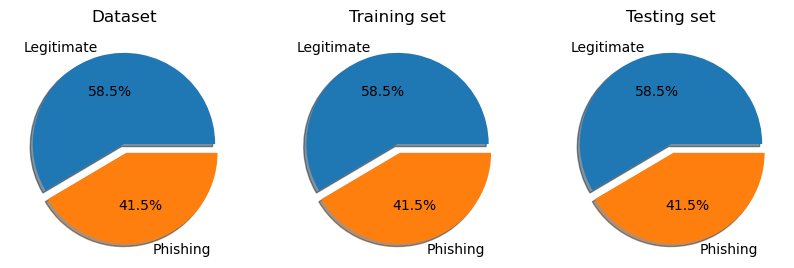

In [56]:
plt.figure(1, figsize=(10, 5))

# Define the data
labels = ['Legitimate', 'Phishing']
data_sizes = data['status'].value_counts()
train_sizes = train_data['status'].value_counts()
test_sizes = test_data['status'].value_counts()
explode = (0, 0.1)

# Create the pie chart
plt.subplot(131)
plt.pie(data_sizes, explode=explode, labels=labels, autopct=lambda pct: f'{pct:.1f}%', shadow=True)
plt.title('Dataset')

plt.subplot(132)
plt.pie(train_sizes, explode=explode, labels=labels, autopct=lambda pct: f'{pct:.1f}%', shadow=True)
plt.title('Training set')

plt.subplot(133)
plt.pie(test_sizes, explode=explode, labels=labels, autopct=lambda pct: f'{pct:.1f}%', shadow=True)
plt.title('Testing set')

# Show the chart
plt.show()

### Missing age imputation

In [10]:
# Define the cross-validation object
cv = KFold(n_splits=5, shuffle=True, random_state=4012)

#### Method 1: Drop the age column

In [11]:
sc_min_max = MinMaxScaler()
sc_mean_sd = StandardScaler()

In [12]:
# Dropping out the age column
X_train_noage = X_train.drop(['age'], axis=1)

##### Random forest

In [13]:
# Cross validation metrics
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_noage, y_train)):
    # Define the trainig set and validation set 
    X_num_train, Y_train = X_train_noage.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train_noage.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Normalize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    # Fit the random forest 
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    
    # Report the metrics
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [14]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.929
Precision:0.928
Recall:0.898
F1-score:0.913


##### KNN

In [15]:
# Cross validation metrics
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_noage, y_train)):
    # Define the trainig set and validation set 
    X_num_train, Y_train = X_train_noage.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train_noage.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Normalize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    # Fit the random forest 
    knn= KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_num_train, Y_train)
    pred = knn.predict(X_num_val)
    
    # Report the metrics
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [16]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.904
Precision:0.895
Recall:0.872
F1-score:0.883


##### SVM

In [17]:
# Cross validation metrics
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_noage, y_train)):
    # Define the trainig set and validation set 
    X_num_train, Y_train = X_train_noage.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train_noage.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Normalize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    # Fit the random forest 
    svm = SVC(kernel='rbf')
    svm.fit(X_num_train, Y_train)
    pred = svm.predict(X_num_val)
    
    # Report the metrics
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [18]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.899
Precision:0.889
Recall:0.863
F1-score:0.876


### Method 2: Mean imputation

In [19]:
# Cross validation metrics
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    # Define the trainig set and validation set 
    X_num_train, Y_train = X_train.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Fill in missing age by mean age
    X_num_train['age'].fillna(X_num_train['age'].mean(), inplace=True)
    X_num_val['age'].fillna(X_num_train['age'].mean(), inplace=True)
    
    # Normalize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [20]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.944
Precision:0.942
Recall:0.922
F1-score:0.932


#### Method 3: Regression imputation

In [21]:
# Cross validation metrics
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    # Define the trainig set and validation set
    X_num_train, Y_train = X_train.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Extract observed data
    # Regress observed age on all other features
    X_num_train_obs = X_num_train.dropna().drop(columns=['age'])
    age_obs =  X_num_train.dropna()['age']
    
    # Fit the regression model with observed data 
    lr_obs = LinearRegression()
    lr_obs.fit(X_num_train_obs, age_obs)
    
    # Impute missing value 
    X_num_train.loc[X_num_train['age'].isna(), 'age'] = lr_obs.predict(X_num_train.loc[X_num_train['age'].isna(), :].drop(['age'], axis=1))
    X_num_val.loc[X_num_val['age'].isna(), 'age'] = lr_obs.predict(X_num_val.loc[X_num_val['age'].isna(), :].drop(['age'], axis=1))
    
    # Normalize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [22]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.942
Precision:0.939
Recall:0.921
F1-score:0.930


#### Method 4: Zero imputation

In [23]:
# Cross validation metrics
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    # Define the trainig set and validation set 
    X_num_train, Y_train = X_train.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Fill in missing age by mean age
    X_num_train['age'].fillna(0, inplace=True)
    X_num_val['age'].fillna(0, inplace=True)
    
    # Normalize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [24]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.943
Precision:0.941
Recall:0.919
F1-score:0.930


### Variable importance

In [25]:
# Extract observed data
train_data_obs = train_data.dropna()
X_train_obs = train_data_obs.drop(columns=['url', 'status', 'age'])
y_train_obs = train_data_obs['age']

# Fit a linear gression model for observed data
lr_obs = LinearRegression()
lr_obs.fit(X_train_obs, y_train_obs)

# Impute missing data in training set
X_train_mis = train_data.loc[train_data['age'].isna(), :].drop(['url', 'status', 'age'], axis=1)
X_train_lr = X_train.copy()
X_train_lr.loc[train_data['age'].isna(), 'age'] = lr_obs.predict(X_train_mis)

X_train_lr_sd = sc_mean_sd.fit_transform(X_train_lr) # Normalize

In [26]:
rf5 = RandomForestClassifier(random_state=4012)
rf5.fit(X_train_lr_sd, y_train)

RandomForestClassifier(random_state=4012)

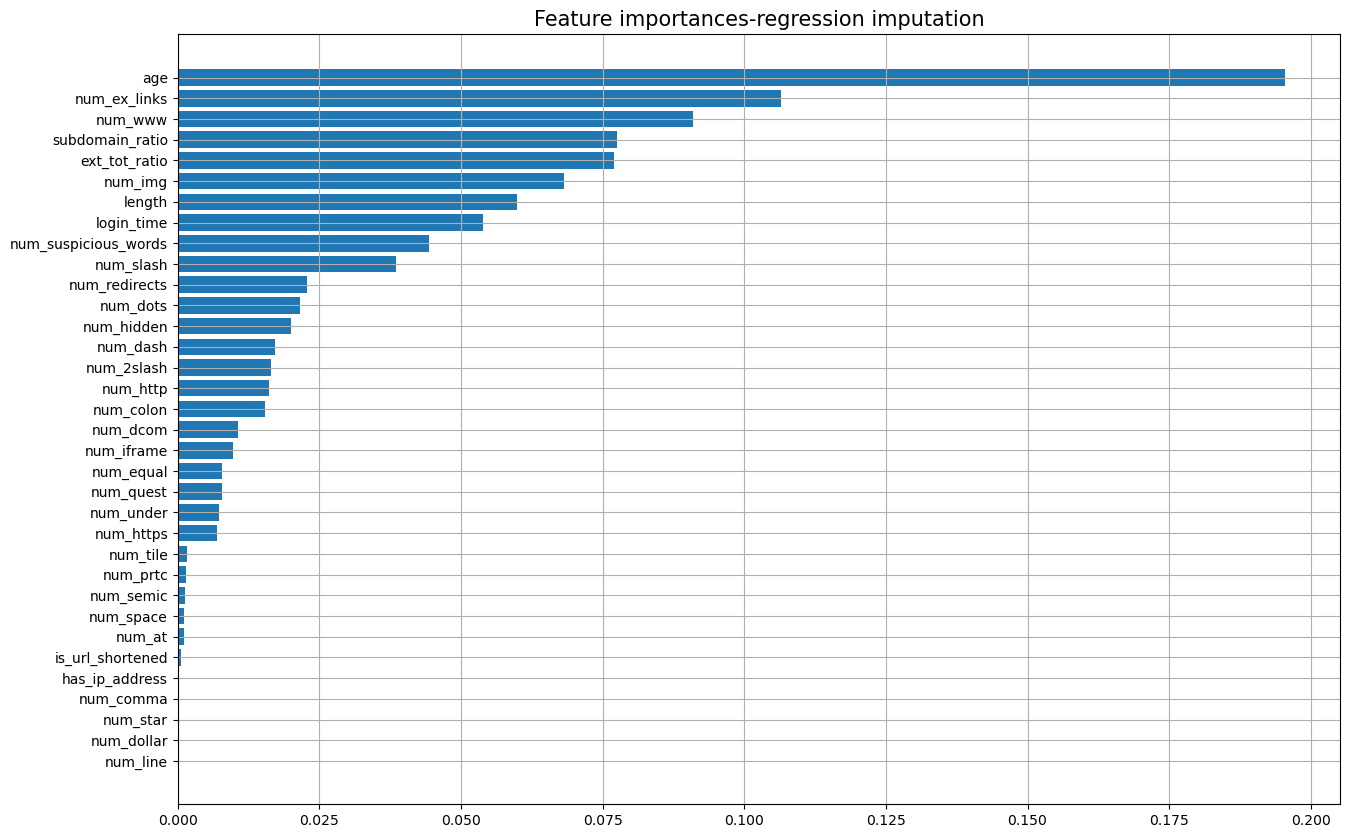

In [27]:
# Get the feature importances from the model
importances = rf5.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)

# Rearrange the feature names so they match the sorted feature importances
names = X_train.columns
names_sorted = [names[i] for i in indices]

# Create the plot
plt.figure(figsize=(15, 10))
plt.title("Feature importances-regression imputation", fontsize=15)
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names_sorted)
plt.grid()
plt.show()

In [28]:
X_train_mean = X_train.copy()
X_train_mean['age'].fillna(X_train_mean['age'].mean(), inplace=True)

X_train_mean_sd = sc_mean_sd.fit_transform(X_train_mean) # Normalize

In [29]:
rf6 = RandomForestClassifier(random_state=4012)
rf6.fit(X_train_mean_sd, y_train)

RandomForestClassifier(random_state=4012)

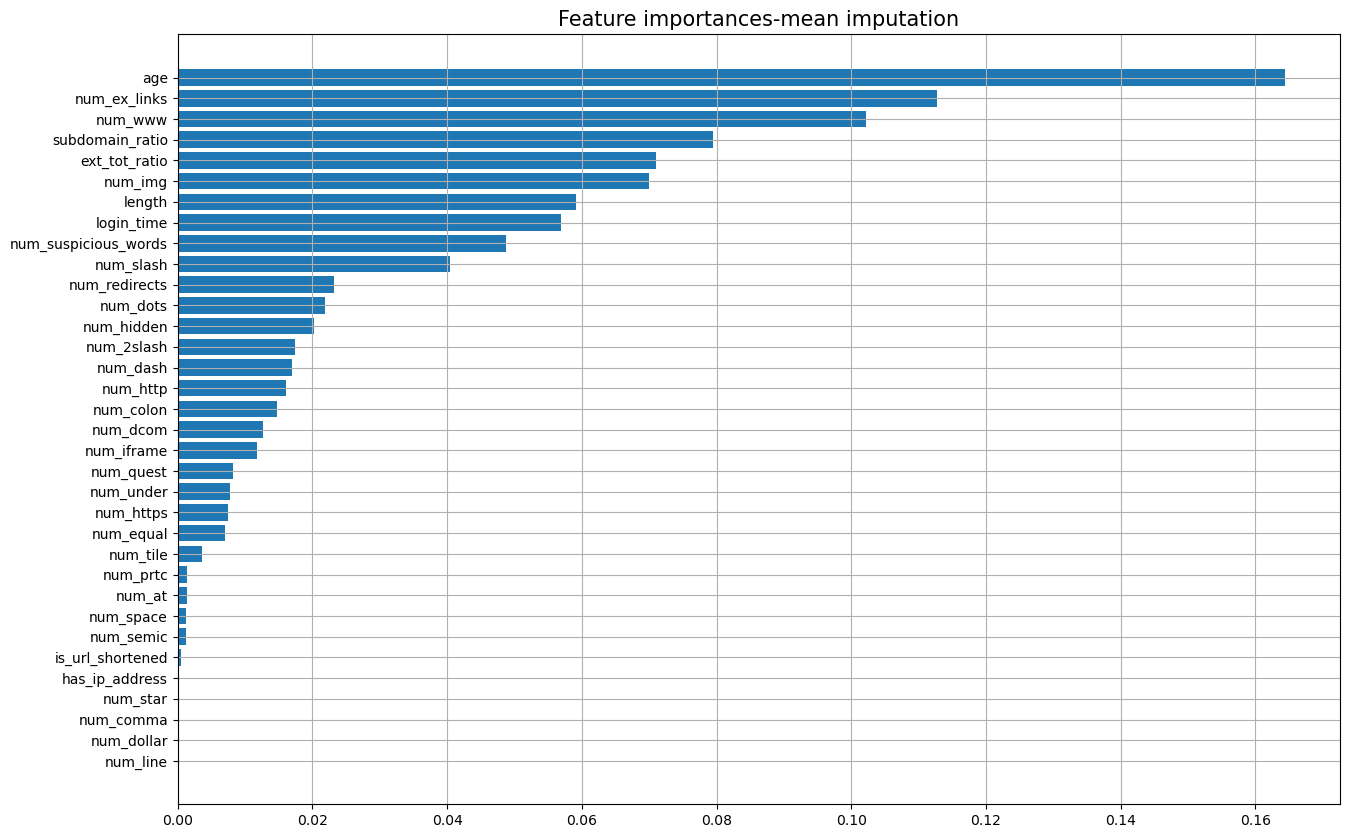

In [30]:
# Get the feature importances from the model
importances = rf6.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)

# Rearrange the feature names so they match the sorted feature importances
names = X_train.columns
names_sorted = [names[i] for i in indices]

# Create the plot
plt.figure(figsize=(15, 10))
plt.title("Feature importances-mean imputation", fontsize=15)
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names_sorted)
plt.grid()
plt.show()

### Outlier detection by PCA

In [31]:
X_train_lr_stand = sc_mean_sd.fit_transform(X_train_lr)

In [32]:
# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
X_train_pca_3 = pca_3.fit_transform(X_train_lr_stand)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_3.explained_variance_ratio_ * 100)
}

# Plot the matrix scatter plot of first 3 PCs.
fig = px.scatter_matrix(
    X_train_pca_3,
    labels=labels,
    dimensions=range(3),
    color=train_data["status"].map({0: "legitimate", 1: "Phishing"}),
    color_discrete_map={"legitimate": "blue", "Phishing": "red"},
    color_continuous_scale=[[0, "blue"], [1, "red"]]
)
fig.update_traces(diagonal_visible=True)
fig.update_layout(title="A matrix scatter plot of the first 3 PCs",width=800,height=500)
fig.show()

In [33]:
pca = PCA()
pca.fit(X_train_lr_stand)

PCA()

In [34]:
pca_cum_var = np.cumsum(pca.explained_variance_ratio_)
print(f'{np.argwhere(pca_cum_var >= 0.7).squeeze()[1]} pcs can explain 70% of the variance')
print(f'{np.argwhere(pca_cum_var >= 0.8).squeeze()[1]} pcs can explain 80% of the variance')
print(f'{np.argwhere(pca_cum_var >= 0.9).squeeze()[1]} pcs can explain 90% of the variance')

15 pcs can explain 70% of the variance
19 pcs can explain 80% of the variance
23 pcs can explain 90% of the variance


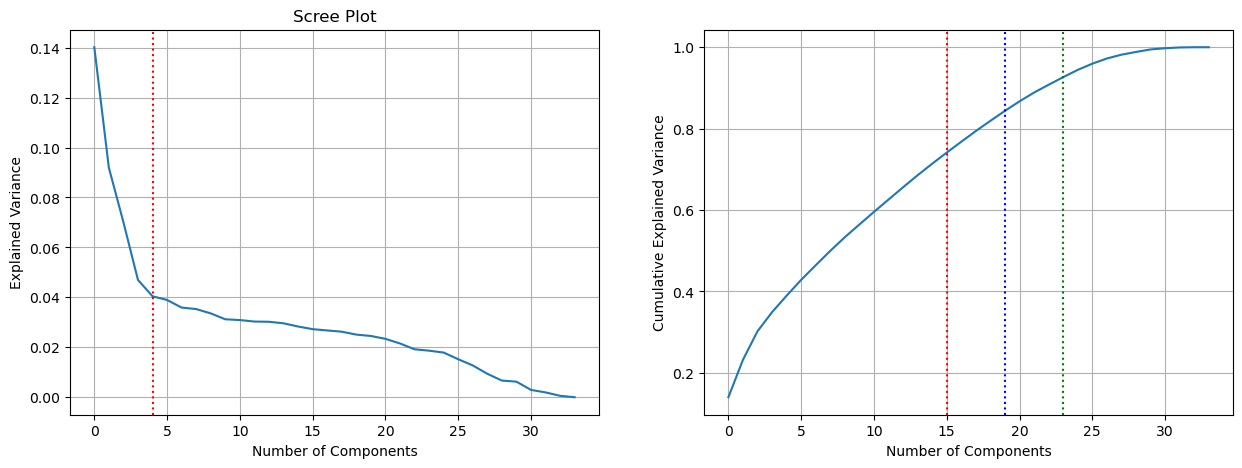

In [35]:
# Plot the scree plot
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(pca.explained_variance_ratio_)
plt.grid()
plt.xlabel("Number of Components")
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.axvline(x=4, color='red',linestyle=":")

plt.subplot(122)
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axvline(x=15, color='red',linestyle=":")
plt.axvline(x=19, color='blue',linestyle=":")
plt.axvline(x=23, color='green',linestyle=":")
plt.show()

In [36]:
# Generate some random multivariate data
X = pca.transform(X_train_lr_stand)

# Compute the sample mean and covariance matrix
mean = np.mean(X, axis=0)
cov = np.cov(X, rowvar=False)
alpha = 1e-6
cov_reg = cov + alpha * np.eye(cov.shape[0])

# Compute the inverse of the covariance matrix (i.e., the precision matrix)
precision = np.linalg.inv(cov_reg)

# Compute the Mahalanobis distance for each data point
distances = [mahalanobis(x, mean, precision) for x in X]

# Define a threshold for the Mahalanobis distance
threshold = np.mean(distances) + 3 * np.std(distances)

# Identify the indices of the outliers
outlier_indices = np.where(np.array(distances) > threshold)[0]

# Remove the outliers from the data
X_train_lr_stand_clean = np.delete(X_train_lr_stand, outlier_indices, axis=0)

train_data_clean = train_data.drop(outlier_indices).reset_index(drop=True)
X_train_clean = X_train.drop(outlier_indices).reset_index(drop=True)
y_train_clean = np.delete(np.array(y_train), outlier_indices, axis=0)

In [37]:
len(outlier_indices)

261

In [38]:
# Apply PCA with 3 components
pca_clean_3 = PCA(n_components=3)
X_train_clean_pca_3 = pca_clean_3.fit_transform(X_train_lr_stand_clean)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca_3.explained_variance_ratio_ * 100)
}

# Plot the matrix scatter plot of first 3 PCs.
fig = px.scatter_matrix(
    X_train_clean_pca_3,
    labels=labels,
    dimensions=range(3),
    color=train_data_clean["status"].map({0: "Valid", 1: "Phishing"}),
    color_discrete_map={"Valid": "blue", "Phishing": "red"},
    color_continuous_scale=[[0, "blue"], [1, "red"]]
)
fig.update_traces(diagonal_visible=True)
fig.update_layout(title="A matrix scatter plot of the first 3 PCs",width=800,height=500)
fig.show()

In [39]:
pca_clean = PCA()
pca_clean.fit(X_train_lr_stand_clean)

PCA()

In [40]:
pca_clean_cum_var = np.cumsum(pca_clean.explained_variance_ratio_)
print(f'{np.argwhere(pca_clean_cum_var >= 0.7).squeeze()[1]} pcs can explain 70% of the variance')
print(f'{np.argwhere(pca_clean_cum_var >= 0.8).squeeze()[1]} pcs can explain 80% of the variance')
print(f'{np.argwhere(pca_clean_cum_var >= 0.9).squeeze()[1]} pcs can explain 90% of the variance')

10 pcs can explain 70% of the variance
13 pcs can explain 80% of the variance
16 pcs can explain 90% of the variance


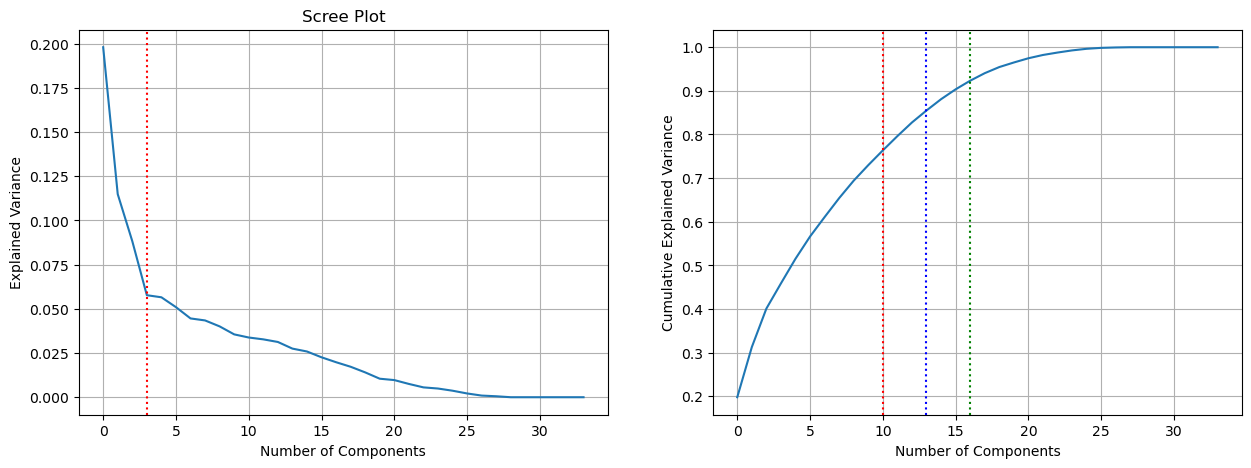

In [41]:
# Plot the scree plot
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(pca_clean.explained_variance_ratio_)
plt.grid()
plt.xlabel("Number of Components")
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.axvline(x=3, color='red',linestyle=":")

plt.subplot(122)
plt.grid()
plt.plot(np.cumsum(pca_clean.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axvline(x=10, color='red',linestyle=":")
plt.axvline(x=13, color='blue',linestyle=":")
plt.axvline(x=16, color='green',linestyle=":")
plt.show()

In [42]:
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_clean, y_train_clean)):
    X_num_train, Y_train = X_train_clean.copy().iloc[train_idx, :] ,y_train_clean[train_idx]
    X_num_val, Y_val = X_train_clean.copy().iloc[val_idx, :], y_train_clean[val_idx]
    
    # Extract observed data
    X_num_train_obs = X_num_train.dropna().drop(columns=['age'])
    age_obs = X_num_train.dropna()['age']
    
    # Fit the regression model with observed data 
    lr_obs = LinearRegression()
    lr_obs.fit(X_num_train_obs, age_obs)
    
    # Impute missing value 
    X_num_train.loc[X_num_train['age'].isna(), 'age'] = lr_obs.predict(X_num_train.loc[X_num_train['age'].isna(), :].drop(['age'], axis=1))
    X_num_val.loc[X_num_val['age'].isna(), 'age'] = lr_obs.predict(X_num_val.loc[X_num_val['age'].isna(), :].drop(['age'], axis=1))
    
    # Normalize the data
    X_num_train = sc_min_max.fit_transform(X_num_train)
    X_num_val = sc_min_max.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [43]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.942
Precision:0.939
Recall:0.917
F1-score:0.928


### Choosing number of PCs

#### 15 PCs that mantains 70% of the variance

In [44]:
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    X_num_train, Y_train = X_train.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Extract observed data
    X_num_train_obs = X_num_train.dropna().drop(columns=['age'])
    age_obs =  X_num_train.dropna()['age']
    
    # Fit the regression model with observed data 
    lr_obs = LinearRegression()
    lr_obs.fit(X_num_train_obs, age_obs)
    
    # Impute missing value 
    X_num_train.loc[X_num_train['age'].isna(), 'age'] = lr_obs.predict(X_num_train.loc[X_num_train['age'].isna(), :].drop(['age'], axis=1))
    X_num_val.loc[X_num_val['age'].isna(), 'age'] = lr_obs.predict(X_num_val.loc[X_num_val['age'].isna(), :].drop(['age'], axis=1))
    
    # Standardize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    # PCA
    pca = PCA(n_components=15)
    X_num_train = pca.fit_transform(X_num_train)
    X_num_val = pca.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [45]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.925
Precision:0.925
Recall:0.892
F1-score:0.908


#### 19 PCs that mantains 80% of the variance

In [46]:
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    X_num_train, Y_train = X_train.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Extract observed data
    X_num_train_obs = X_num_train.dropna().drop(columns=['age'])
    age_obs =  X_num_train.dropna()['age']
    
    # Fit the regression model with observed data 
    lr_obs = LinearRegression()
    lr_obs.fit(X_num_train_obs, age_obs)
    
    # Impute missing value 
    X_num_train.loc[X_num_train['age'].isna(), 'age'] = lr_obs.predict(X_num_train.loc[X_num_train['age'].isna(), :].drop(['age'], axis=1))
    X_num_val.loc[X_num_val['age'].isna(), 'age'] = lr_obs.predict(X_num_val.loc[X_num_val['age'].isna(), :].drop(['age'], axis=1))
    
    # Standardize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    # PCA
    pca = PCA(n_components=19)
    X_num_train = pca.fit_transform(X_num_train)
    X_num_val = pca.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [47]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.928
Precision:0.927
Recall:0.896
F1-score:0.911


#### 23 PCs that mantains 90% of the variance

In [48]:
acc = []
f1 = []
pre = []
rec = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train)):
    X_num_train, Y_train = X_train.copy().iloc[train_idx, :] ,y_train[train_idx]
    X_num_val, Y_val = X_train.copy().iloc[val_idx, :], y_train[val_idx]
    
    # Extract observed data
    X_num_train_obs = X_num_train.dropna().drop(columns=['age'])
    age_obs =  X_num_train.dropna()['age']
    
    # Fit the regression model with observed data 
    lr_obs = LinearRegression()
    lr_obs.fit(X_num_train_obs, age_obs)
    
    # Impute missing value 
    X_num_train.loc[X_num_train['age'].isna(), 'age'] = lr_obs.predict(X_num_train.loc[X_num_train['age'].isna(), :].drop(['age'], axis=1))
    X_num_val.loc[X_num_val['age'].isna(), 'age'] = lr_obs.predict(X_num_val.loc[X_num_val['age'].isna(), :].drop(['age'], axis=1))
    
    # Standardize the data
    X_num_train = sc_mean_sd.fit_transform(X_num_train)
    X_num_val = sc_mean_sd.transform(X_num_val)
    
    # PCA
    pca = PCA(n_components=23)
    X_num_train = pca.fit_transform(X_num_train)
    X_num_val = pca.transform(X_num_val)
    
    rf = RandomForestClassifier(random_state=4012)
    rf.fit(X_num_train, Y_train)
    pred = rf.predict(X_num_val)
    acc.append(accuracy_score(Y_val, pred))
    f1.append(f1_score(Y_val, pred))
    pre.append(precision_score(Y_val, pred))
    rec.append(recall_score(Y_val, pred))

In [49]:
# Print the metrics
print("Accuracy: %0.3f" % (np.mean(acc)))
print("Precision:%0.3f" % (np.mean(pre)))
print("Recall:%0.3f" % (np.mean(rec)))
print("F1-score:%0.3f" % (np.mean(f1)))

Accuracy: 0.929
Precision:0.931
Recall:0.895
F1-score:0.912


#### Save the imputed data

In [50]:
X_train_mis = train_data.loc[train_data["age"].isna(), :].drop(["url", "status", "age"], axis=1)
train_data.loc[train_data["age"].isna(), "age"] = lr_obs.predict(X_train_mis)
train_data

,url,age,num_suspicious_words,has_ip_address,is_url_shortened,length,subdomain_ratio,num_dots,num_www,num_dcom,...,num_semic,num_comma,login_time,num_ex_links,num_redirects,num_img,num_iframe,num_hidden,ext_tot_ratio,status
0,https://www.crossstitch.pk/,17.266665,0,0,0,27,0.666667,2,1,0,...,0,0,1.296597,247.0,1.0,95.0,1.0,1.0,247.0,0
1,http://www.wikiwand.com/en/LATAM_Chile,9.200000,0,0,0,38,0.421053,2,1,1,...,0,0,0.093795,91.0,1.0,3.0,0.0,1.0,91.0,0
2,http://www.iconmeals.com/,9.065753,0,0,0,25,0.680000,2,1,1,...,0,0,1.031102,105.0,1.0,20.0,0.0,1.0,105.0,0
3,http://calvaryepiscopalbatavia.org/wp-includes...,7.057534,1,0,0,68,0.397059,1,0,0,...,0,0,0.640474,0.0,0.0,0.0,0.0,0.0,0.0,1
4,www.sharpaviation.com.au/index.php/pt_home,27.353425,0,0,0,42,0.571429,4,1,1,...,0,0,5.873612,76.0,1.0,11.0,1.0,1.0,76.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14155,http://lbcpzonasegurabeta.rf.gd/,9.638965,0,0,0,32,0.750000,2,0,0,...,0,0,0.734203,0.0,0.0,0.0,0.0,0.0,0.0,1
14156,https://www.e-serviceparts.info/landingpages/d...,4.575342,0,0,0,125,0.184000,2,1,0,...,0,0,0.046956,0.0,0.0,0.0,0.0,0.0,0.0,1
14157,rzr.online.fr/resume.htm,14.227397,0,0,0,24,0.541667,3,0,0,...,0,0,1.753927,1.0,0.0,0.0,0.0,0.0,1.0,0
14158,en.wikipedia.org/wiki/Aldus_Corporation,22.191781,0,0,0,39,0.410256,2,0,0,...,0,0,0.298482,330.0,1.0,11.0,0.0,4.0,330.0,0


In [51]:
X_test_mis = test_data.loc[test_data["age"].isna(), :].drop(["url", "status", "age"], axis=1)
test_data.loc[test_data["age"].isna(), "age"] = lr_obs.predict(X_test_mis)
test_data

,url,age,num_suspicious_words,has_ip_address,is_url_shortened,length,subdomain_ratio,num_dots,num_www,num_dcom,...,num_semic,num_comma,login_time,num_ex_links,num_redirects,num_img,num_iframe,num_hidden,ext_tot_ratio,status
0,www.readwriteweb.com/archives/how_to_make_face...,19.928767,0,0,0,67,0.298507,3,1,1,...,0,0,0.626011,0.0,0.0,0.0,0.0,0.0,0.0,0
1,www.angelfire.com/wa/chess/,24.438356,0,0,0,27,0.629630,2,1,1,...,0,0,1.671667,3.0,1.0,2.0,1.0,1.0,3.0,0
2,agendasanjuan.com/webmaster/webmaster/online/P...,4.621918,0,0,0,61,0.278689,2,0,2,...,0,0,4.292719,1.0,0.0,2.0,0.0,0.0,1.0,1
3,casa.colorado.edu/~ajsh/mangle/,21.288945,1,0,0,31,0.548387,2,0,0,...,0,0,1.468554,1.0,1.0,0.0,0.0,0.0,1.0,0
4,http://www.merry-thought.com/media/.26-2020,12.013699,0,0,0,43,0.488372,3,1,1,...,0,0,0.468642,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,http://www.glambeaute.com/--/31458/Login.html,5.449315,0,0,0,45,0.400000,3,1,1,...,0,0,0.374861,0.0,1.0,0.0,0.0,0.0,0.0,1
3537,www.rudeserver.com/socket/index.html,23.002740,0,0,0,36,0.500000,3,1,1,...,0,0,1.852684,19.0,1.0,4.0,0.0,0.0,19.0,0
3538,draydelhouse.com/tmpl/webmail.tam.com.br/c1/ca...,20.852055,0,0,0,68,0.235294,5,0,2,...,0,0,9.945467,0.0,0.0,0.0,0.0,0.0,0.0,1
3539,http://www.mtv.co.uk/music/playlists/vh1-playlist,26.498630,0,0,0,49,0.265306,3,1,0,...,0,0,0.906034,21.0,1.0,20.0,0.0,7.0,21.0,0


In [52]:
train_data.to_csv("/Users/yihongan/Desktop/lr_imputed_train.csv", index=False, header=True)
test_data.to_csv("/Users/yihongan/Desktop/lr_imputed_test.csv", index=False, header=True)

### Save the linear regression imputer

In [53]:
pickle.dump(lr_obs, open('/Users/yihongan/Desktop/lr_imputer.pkl', 'wb'))